In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load Data

## Download & Extract Data

In [2]:
# import gdown

# url="https://drive.google.com/uc?export=download&confirm=9iBg&id=1m5a8KpwDZOzzxhbPK37vQBYNUUEbKXbm"
# filepath = "../../Data/gDriveData/nyc_taxi_trip_duration.zip"

# !rm ../../Data/gDriveData/nyc_taxi_trip_duration.*

# gdown.download(url, filepath, quiet=False)

# !cd ../../Data/gDriveData && unzip nyc_taxi_trip_duration.zip && rm nyc_taxi_trip_duration.zip

## Load Data

In [3]:
df = pd.read_csv("../../Data/gDriveData/nyc_taxi_trip_duration.csv")

In [4]:
df.shape

(729322, 11)

In [5]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [7]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


# Explore Data

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

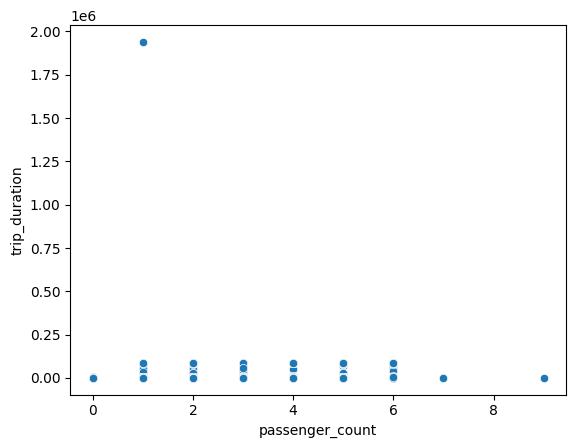

In [8]:
sns.scatterplot(x=df["passenger_count"], y=df["trip_duration"])

# Prepare Data

In [9]:
from math import radians, cos, sin, asin, sqrt


def distance(lat1, lon1, lat2, lon2):
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2

    c = 2 * asin(sqrt(a))

    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371

    # calculate the result
    return c * r

In [10]:
distances = []

for _, row in df.iterrows():
    distances.append(
        distance(
            row["pickup_latitude"],
            row["pickup_longitude"],
            row["dropoff_latitude"],
            row["dropoff_longitude"],
        )
    )

df["distance"] = distances
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.199073
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.129111
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.250753
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.361097
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.328534


In [11]:
df.drop(["id", "pickup_datetime", "dropoff_datetime"], axis=1, inplace=True)
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].map({"N": 0, "Y": 1})

In [12]:
df["store_and_fwd_flag"].unique()

array([0, 1], dtype=int64)

In [13]:
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))


df = df.apply(normalize)

In [14]:
# V1
# X = df[["vendor_id", "passenger_count", "store_and_fwd_flag", "distance"]]

# V2
X = df[["vendor_id", "passenger_count", "distance"]]

# V3
# X = df[["passenger_count", "distance"]]

y = df["trip_duration"]

X.shape, y.shape

((729322, 2), (729322,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.9, random_state=1000
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((656389, 2), (72933, 2), (656389,), (72933,))

# Training

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
model.intercept_

0.00026589025466014515

In [18]:
pd.DataFrame(model.coef_, X_train.columns, columns=["Coefficient"])

,Coefficient
passenger_count,0.000163
distance,0.070102


# Evaluation

In [19]:
y_pred = model.predict(X_test)

In [20]:
r2_score(y_test, y_pred)

0.02643839343861676

In [21]:
mean_squared_error(y_test, y_pred)

2.624738332526616e-06

In [22]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     5062.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:58:41   Log-Likelihood:             3.1439e+06
No. Observations:              656389   AIC:                        -6.288e+06
Df Residuals:                  656386   BIC:                        -6.288e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0003   4.44e-06     59.864      0.000       0.000       0.000
passenger_count     0.0002    1.7e-05      9.548      0.000       0.000       0.000
distance            0.0701      0.001    100.080      0.000       0.069       0.071
===============================================================================
Omnibus:                  3211455.119   Durbin-Watson:                    1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   235045607432278.875
Skew:                         199.210   Prob(JB):                          0.00
Kurtosis:                   92706.692   Cond. No.                          287.
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""